# Mount google drive

In [11]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Load library

In [61]:
import numpy as np
import pandas as pd
import tensorflow
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

# Load dataset

In [29]:
data_path = '/content/drive/MyDrive/DataSet/Churn_Modelling.csv'
df = pd.read_csv(data_path)

# Dataset information

In [30]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [31]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Check how many num of customers leave the bank

In [32]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


# Check num of customer respect of gender and geography

In [33]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [34]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


# To make our calculation more easy drop some column

In [35]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [36]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Lebel encoding string data

In [37]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [38]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


# Split data for train and test

In [78]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [79]:
X_train.shape

(8000, 11)

# Transform data using scaler

In [99]:
# Initialize the StandardScaler, which will standardize the features by removing the mean and scaling to unit variance.
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_trf = scaler.fit_transform(X_train)
# This step does two things:
# 1. 'fit': Calculates the mean and standard deviation for each feature in X_train.
# 2. 'transform': Applies the scaling (using the mean and std dev calculated) to standardize the features in X_train.
# The result is a scaled version of X_train (stored in X_train_trf) where each feature has a mean of 0 and a standard deviation of 1.

# Transform the test data using the parameters learned from the training data
X_test_trf = scaler.transform(X_test)
# This applies the same scaling (mean and standard deviation) obtained from X_train to the test data, X_test.
# It ensures that X_test is standardized in the same way as X_train, keeping consistency between the datasets.
# Note that we do not fit the scaler again with X_test, to avoid data leakage and ensure fair evaluation.


In [100]:
X_train_trf

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

# Make a secquential model

In [101]:
model = Sequential()

# Add the first layer (input layer) to the model
model.add(Dense(11, activation='sigmoid', input_dim=11))
# This is the first dense (fully connected) layer with:
# - 11 neurons (units), which matches the number of input features (input_dim=11).
# - 'sigmoid' activation function, which outputs values between 0 and 1. This is often used in binary classification
# and ensures that each neuron’s output is squashed into a range between 0 and 1.
# - The input_dim=11 specifies that the input data has 11 features. This defines the shape of the input data
# for this layer.

# Add the second layer (hidden layer) to the model
model.add(Dense(11, activation='sigmoid'))
# This is another dense layer with:
# - 11 neurons (same as the previous layer).
# - 'sigmoid' activation function is used again to introduce non-linearity to the model.
# - No input_dim is needed because it automatically connects to the previous layer's output.

# Add the third layer (output layer) to the model
model.add(Dense(1, activation='sigmoid'))
# This is the output layer with:
# - 1 neuron, which is typical for binary classification (outputting a single probability value).
# - 'sigmoid' activation function ensures the output value is between 0 and 1, representing the probability of a positive class (useful for binary classification tasks).

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

# Complie model

In [102]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

# Fit model

In [103]:
# Train the model using the training data

# Number of samples per gradient update. The model will process 50 samples at a time before updating the weights.
# Number of times the model will iterate over the entire training dataset.
# Verbosity mode. '1' shows progress with a progress bar and performance metrics during training.
# Splits 20% of the training data to be used as the validation set.
history = model.fit(X_train, y_train,
                    batch_size=50,
                    epochs=100,
                    verbose=1,
                    validation_split=0.2)
# The fit method trains the model on the training data (X_train and y_train) using the specified parameters.
# During training, the model will iterate over the dataset 100 times (epochs), with each epoch processing the data
# in batches of 50 samples.
# The validation_split parameter specifies that 20% of X_train and y_train will be set aside for validation,
# allowing the model to check its performance on unseen data after each epoch and help monitor overfitting.
# The 'history' object stores the training history, which includes information such as loss and accuracy over
# the epochs for both training and validation.


Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6471 - loss: 0.6508 - val_accuracy: 0.7969 - val_loss: 0.5355
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7940 - loss: 0.5251 - val_accuracy: 0.7969 - val_loss: 0.5049
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7996 - loss: 0.5001 - val_accuracy: 0.7969 - val_loss: 0.5010
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7912 - loss: 0.5083 - val_accuracy: 0.7969 - val_loss: 0.4998
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7992 - loss: 0.4976 - val_accuracy: 0.7969 - val_loss: 0.4989
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7912 - loss: 0.5072 - val_accuracy: 0.7969 - val_loss: 0.4982
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7927 - loss: 0.5062 - val_accuracy: 0.7969 - val_loss: 0.4975
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7962 - loss: 0.4996 - val_accu

In [89]:
# This is using in the context of deep learning, particularly with models
model.layers[2].get_weights()

[array([[1.2546254],
        [1.1782973],
        [0.770521 ]], dtype=float32),
 array([-1.9767797], dtype=float32)]

# Predict data

In [104]:
y_pred = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [105]:
# Convert the predicted values (y_pred) to class labels using argmax.
y_pred = y_pred.argmax(axis=-1)
# This is typically used when the model outputs probabilities for multiple classes (e.g., in multi-class classification).
# 'argmax(axis=-1)' finds the index of the maximum value along the last axis (the class with the highest probability).
# It effectively converts the model's output (probabilities for each class) into a single class label per prediction.
# The result is a 1-dimensional array containing the predicted class labels for each sample.


# Show accuracy

In [107]:
history.history

{'accuracy': [0.7510937452316284,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716

In [108]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7975

# Show graph to visualise the loss

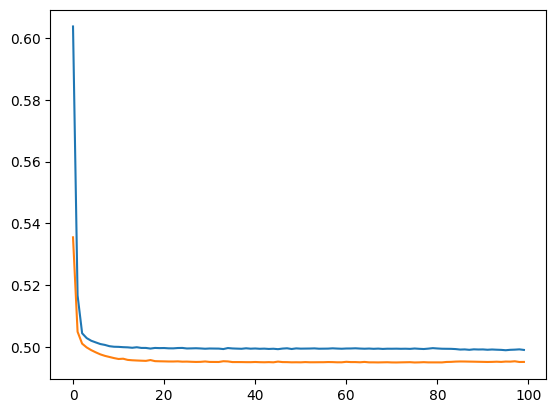

In [109]:
# Plot the training and validation loss over epochs using matplotlib.

plt.plot(history.history['loss'])
# This plots the training loss recorded during each epoch.
# 'history.history['loss']' accesses the loss values for the training data from the history object returned by
# the model's fit method.
# It helps visualize how the model's loss on the training set changes over time, showing the learning progress.

plt.plot(history.history['val_loss'])
# This plots the validation loss recorded during each epoch.
# 'history.history['val_loss']' accesses the loss values for the validation data (if a validation set was
# provided during training).
# It helps visualize the model's performance on unseen validation data, indicating if the model
# is overfitting (validation loss increases) or learning well (both losses decrease).


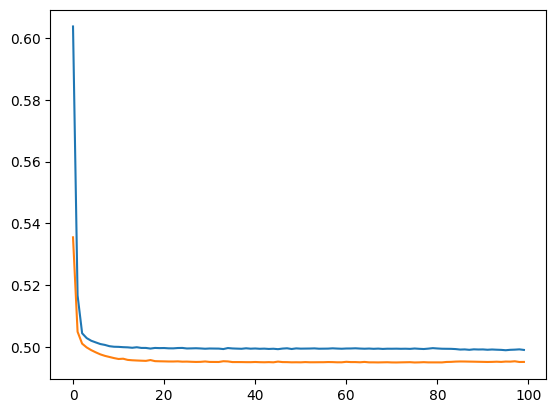

In [116]:
# Plot the training and validation loss over epochs using matplotlib.

plt.plot(history.history['loss'])
# This plots the training loss recorded during each epoch.
# 'history.history['loss']' accesses the loss values for the training data from the history object returned
# by the model's fit method.
# It helps visualize how the model's loss on the training set changes over time, showing the learning progress.

plt.plot(history.history['val_loss'])
# This plots the validation loss recorded during each epoch.
# 'history.history['val_loss']' accesses the loss values for the validation data (if a validation set was provided
# during training).
# It helps visualize the model's performance on unseen validation data, indicating if the model is overfitting
# (validation loss increases) or learning well (both losses decrease).


# Check over feeting

In [117]:
# Convert accuracy history into lists for easy comparison
val_acc = history.history['val_accuracy']
train_acc = history.history['accuracy']

# Initialize overfitting_epoch as None in case no overfitting is detected
overfitting_epoch = None

# Identify the first epoch where validation accuracy starts to decrease
for i in range(1, len(val_acc)):
    if val_acc[i] < val_acc[i - 1]:  # Check if validation accuracy decreases
        overfitting_epoch = i  # Set overfitting epoch to the first decline point
        break

# Print the epoch where overfitting likely starts
if overfitting_epoch is not None:
    print(f"Overfitting likely starts at epoch {overfitting_epoch}.")
else:
    print("No overfitting detected within the given epochs.")



No overfitting detected within the given epochs.
